<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 6

### Problem 0 (3 points)

## Preamble: The MNIST Dataset  

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def standardize(data):
    scaler = StandardScaler().fit(data)
    data = scaler.transform(data).astype(np.float32)
    return data, scaler.mean_, scaler.scale_

In [3]:
def load_mnist():
    digits = datasets.load_digits()
    n, shape = digits.images.shape[0], digits.images.shape[1:]
    xs = digits.images.reshape((n, -1)).astype(np.float32)
    max_pixel = np.max(xs)
    xs, mean, std = standardize(xs)
    ys = digits.target.astype(np.uint8)
    return xs, ys, mean, std, max_pixel, shape

In [4]:
def data_split(xs, ys, test_fraction=0.5):
    x_train, x_test, y_train, y_test = train_test_split(
        xs, ys, test_size=test_fraction, shuffle=True)
    train = {'x': x_train, 'y': y_train}
    test = {'x': x_test, 'y': y_test}
    data = {'train': train, 'test': test}
    return data

In [5]:
def x_to_image(x):
    x = np.round(x * pixel_std + pixel_mean)
    x = np.clip(x * 255. / pixel_max, 0., 255.).astype(np.uint8)
    return np.reshape(x, image_shape)

In [6]:
def show_random_images(xs, ys, rows=3, columns=6):
    rng = np.random.default_rng()
    indices = rng.integers(low=0, high=len(ys), size=rows * columns)
    plt.figure(figsize=(2 * columns, 2.1 * rows), tight_layout=True)
    for plot, index in enumerate(indices):
        image = x_to_image(xs[index])
        plt.subplot(rows, columns, plot + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(ys[index], fontsize=18)
    plt.show()

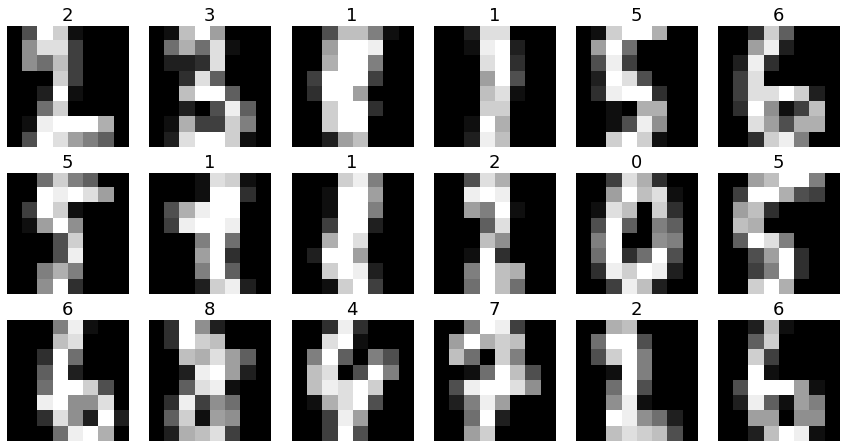

In [7]:
data_points, digit_labels, pixel_mean, pixel_std, pixel_max, image_shape = load_mnist()
show_random_images(data_points, digit_labels)
digit_dataset = data_split(data_points, digit_labels)

## Preamble: Three Classifiers

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

tolerance = 1.e-8
LogReg = LogisticRegression(
    C=1, solver='lbfgs', tol=tolerance,
    max_iter=100000, random_state=0)
LinearSvm = SVC(kernel='linear', tol=tolerance)
RbfSvm = SVC(kernel='rbf', tol=tolerance)
classify = [LogReg, LinearSvm, RbfSvm]
classify_string = ["Logistic Regression", "Linear SVM", "Rbf SVM"]

## Part 1: Binary Classifiers

### Problem 1.1

In [9]:
def evaluate(h, data):
    def error_rate(predictor, samples):
        x, y = samples['x'], samples['y']
        return (1 - predictor.score(x, y)) * 100

    e_train = error_rate(h, data['train'])
    e_test = error_rate(h, data['test'])
    return e_train, e_test

In [10]:
def evaluate_classifiers(xs,ys):
    for j, f in enumerate(classify):
        train_eval, test_eval = np.zeros(10), np.zeros(10)
        for i in range(10):
            sets = data_split(xs, ys)
            train_eval[i], test_eval[i] = evaluate(f.fit(sets['train']['x'], sets['train']['y']), sets)
        print("\n Error statistics for the " + classify_string[j] + " classifier (percent):")
        print("Training: min " + str(round(np.min(train_eval),3)) 
              + " max " + str(round(np.max(train_eval),3))
              + " mean " + str(round(np.mean(train_eval),3))
              + " std " + str(round(np.std(train_eval),3)))
        print("Testing: min " + str(round(np.min(test_eval),3)) 
              + " max " + str(round(np.max(test_eval),3))
              + " mean " + str(round(np.mean(test_eval),3))
              + " std " + str(round(np.std(test_eval),3)))

In [11]:
pair_labels = digit_labels[(digit_labels == 3) | (digit_labels == 7)]
pair_data_points = data_points[(digit_labels==3) | (digit_labels == 7)]

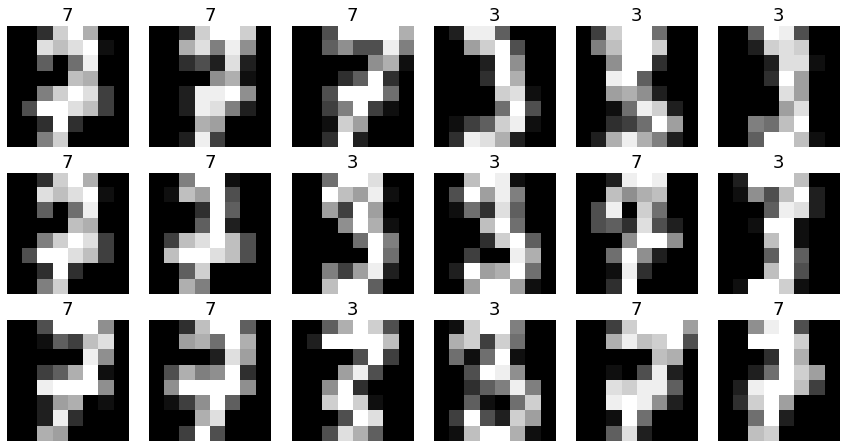

In [12]:
show_random_images(pair_data_points, pair_labels)

In [107]:
evaluate_classifiers(pair_data_points, pair_labels)


 Error statistics for the Logistic Regression classifier (percent):
Training: min 0.0 max 0.0 mean 0.0 std 0.0
Testing: min 0.0 max 1.105 mean 0.276 std 0.445

 Error statistics for the Linear SVM classifier (percent):
Training: min 0.0 max 0.0 mean 0.0 std 0.0
Testing: min 0.0 max 1.105 mean 0.442 std 0.413

 Error statistics for the Rbf SVM classifier (percent):
Training: min 0.0 max 0.0 mean 0.0 std 0.0
Testing: min 0.0 max 1.657 mean 0.718 std 0.701


### Problem 1.2 (Exam Style)

All of the training data are linearly separable because from the error statistics, we can see that both the minimum and maximum training error for all three classifiers are 0, meaning that the classifiers are able to separate the training data without any outlier data point lying on the wrong side of the hyperplane. The testing data however is not all linearly separable - some are as we can see from the zero minimum testing error, but many aren't as we can see from the other nonzero metrics. 

### Problem 1.3 (Exam Style)

I don't think my experiment show conclusively that RBF SVM generalize better than linear SVM. After running evaluate_classifiers multiple times, I can see that the testing error in this case for Rbf SVM is consistently higher than that of the linear SVM. However, the standard deviation is rather large in porportion to the amount of errors we are seeing. In this case, Rbf SVM likely overfits the training data since it uses curves instead of straight lines to separate the data. Since the training sets are linearly separable, a linear kernal is better in our situation; however, this does not mean that RBF is a worse kernal than the linear kernal, since it would perform much better than the linear kernal on datasets that are not linearly separable in lower dimensions.

### Problem 1.4

In [14]:
parity_labels = digit_labels%2

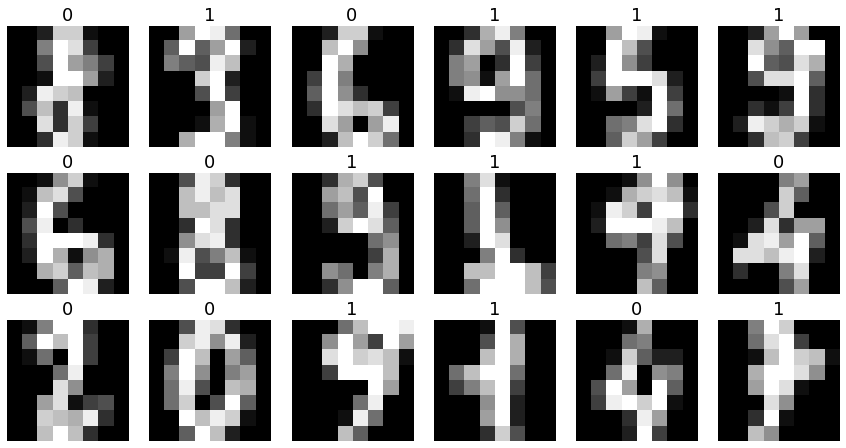

In [15]:
show_random_images(data_points, parity_labels)

In [108]:
evaluate_classifiers(data_points, parity_labels)


 Error statistics for the Logistic Regression classifier (percent):
Training: min 5.234 max 7.35 mean 6.047 std 0.64
Testing: min 8.343 max 9.677 mean 9.088 std 0.413

 Error statistics for the Linear SVM classifier (percent):
Training: min 4.232 max 6.236 mean 5.512 std 0.53
Testing: min 7.341 max 10.234 mean 9.132 std 0.951

 Error statistics for the Rbf SVM classifier (percent):
Training: min 0.0 max 0.78 mean 0.39 std 0.269
Testing: min 1.335 max 2.558 mean 2.036 std 0.382


### Problem 1.5 (Exam Style)

The Rbf SVM classifier performs the best in this situation. In this experiment, the training data is clearly not linearly separable since the training errors of the linear svm is non-zero. Therefore, the linear SVM in the previous case that performed well would not do as great in this experiment. Since with the gaussian kernal the classifier is able to use separate and fit the data well by mapping it to higher dimensions, it is able to fit data that is otherwise not linearly separable in lower dimensions. 

### Problem 1.6 (Exam Style)

The Rbf kernal likely overfits the data since it adapts to the data by mapping it to a higher dimension where the data is linearly separable. A tell tale sign is that the Rbf SVM classifier has a 0 mininum and a very low maximum training error, but a higher testing error range, indicating that it fits to the training data well but does less well on unseen data.

## Part 2: Margins 

In [17]:
def hyperplane(h):
    return h.intercept_, h.coef_[0]

### Problem 2.1

In [18]:
def margins(data,h):
    b,w = hyperplane(h)
    ref_margin = 1/np.linalg.norm(w)
    m = ref_margin*data['y']*(np.matmul(w, data['x'].T)+b)
    return m, ref_margin

In [19]:
def show_margins(m, ref_margin, title, font_size=18):
    plt.figure(figsize=(15, 3), tight_layout=True)
    edges = np.logspace(-2, np.log10(max(m)), 50)
    plt.hist(m, bins=edges, rwidth=0.9)
    plt.axvline(ref_margin, color='r', lw=3.)
    title = 'Margin distribution for the {}'.format(title)
    plt.title(title, fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.show()

In [20]:
def show_all_classifier_margins(dataset):
    for i, classify in enumerate ([LogReg, LinearSvm]):
        h = classify.fit(dataset['train']['x'], dataset['train']['y'])
        for data in ['train', 'test']:
            m, ref_margin = margins(dataset[data], h)
            show_margins(m, ref_margin, classify_string[i] + " on " + data.capitalize() + "ing Data")

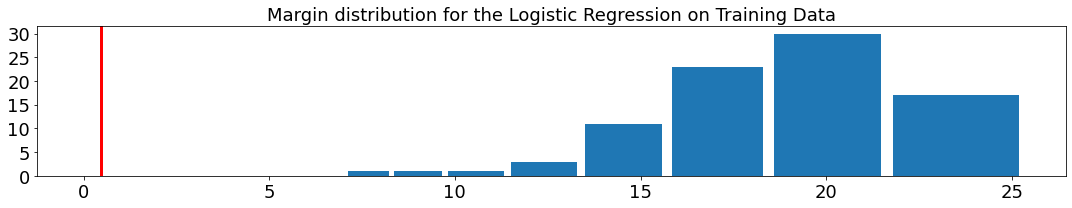

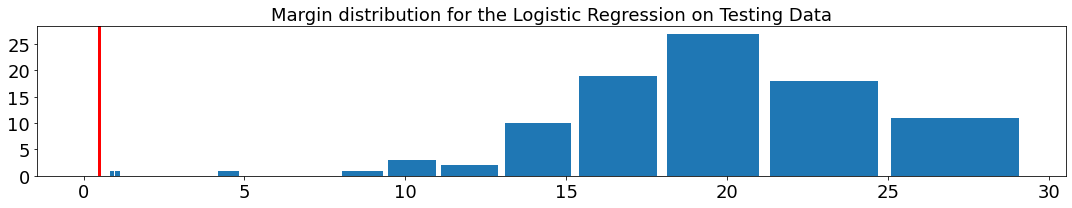

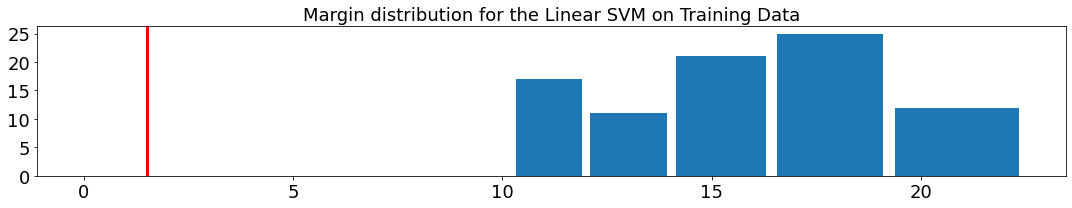

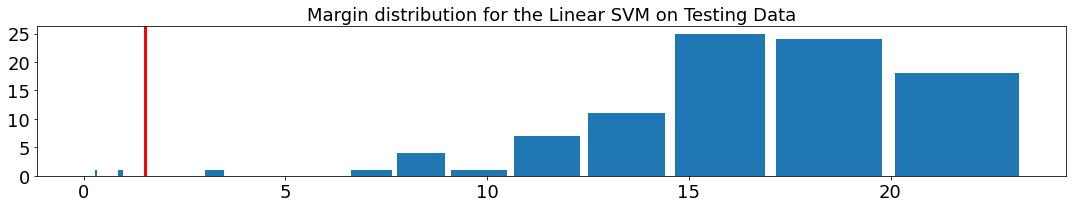

In [182]:
pair_dataset = data_split(pair_data_points, pair_labels) 
show_all_classifier_margins(pair_dataset)

### Problem 2.2 (Exam Style)

It seems like during training, using Linear SVM tend to result in a distribution where the data are more evenly distributed across the margin distances range than that of the logistric regression. The distribution for the logistic regression on training data tend to follow a relatively normal curve, where we can often see low concentrations of datapoints at lower margin, whereas such datapoints are rarely seen when using linear cvm. I find this to be a relatively minor pattern that can possibly be explained by the fact that logistic regression gives probabilities whereas linear SVM is geometric and maximizes margins.

### Problem 2.3

In [22]:
parity_dataset = data_split(data_points, parity_labels)

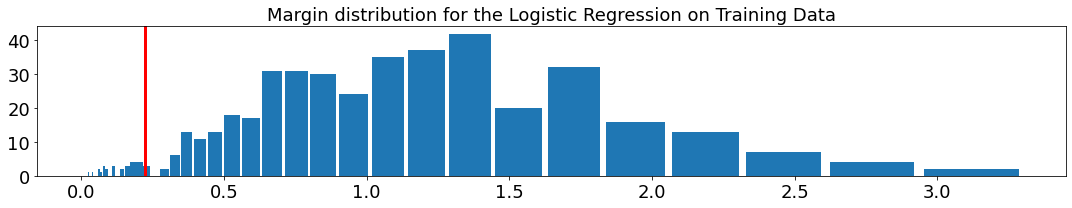

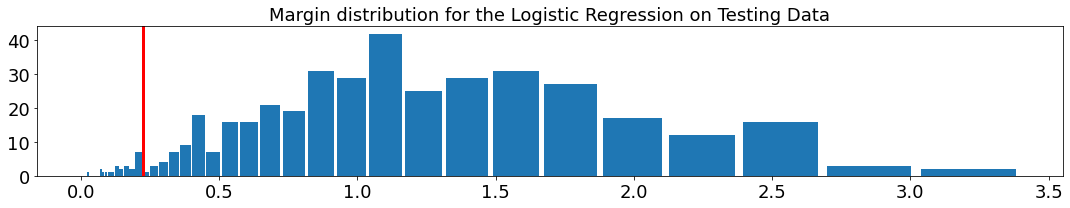

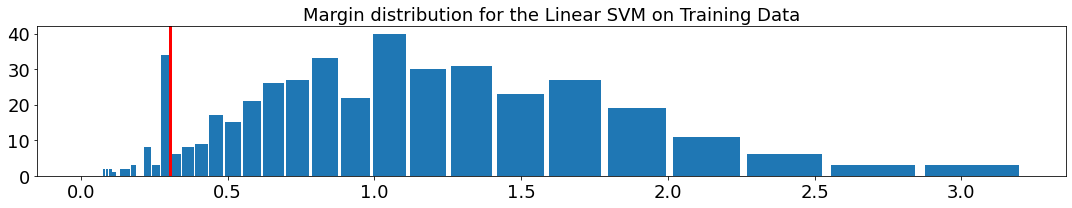

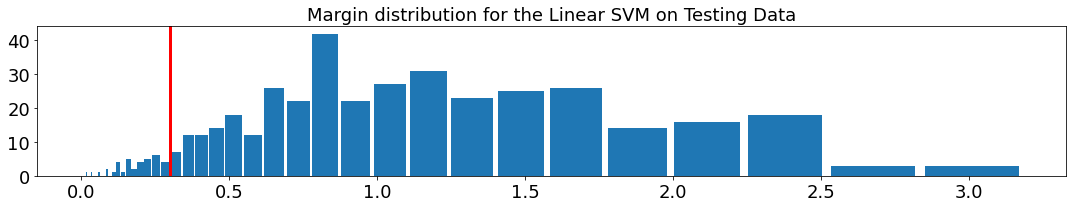

In [186]:
show_all_classifier_margins(parity_dataset)

### Problem 2.4 (Exam Style)

In the margin distribution graph for the linear SVM on training data, there seem to always exists a high concentration of margins at the reference margin. This could be explained by how the separating hyperplane is computed, which is based on a loss function that is heavily dependent on the reference margin - if the margin is larger than the reference margin then it implies lower risk whereas lower than the reference margin means higher risk. This means that the fit function in a linearly unseparable dataset would pick a plane that maximizes the number datapoints whose margins are on or outside of the reference margin in order to minimize risk. 

## Part 3: Multiclass Classifiers

### Problem 3.1 (Partially Exam Style)

In [196]:
evaluate_classifiers(data_points, digit_labels)


 Error statistics for the Logistic Regression classifier (percent):
Training: min 0.0 max 0.223 mean 0.045 std 0.074
Testing: min 2.892 max 5.117 mean 3.604 std 0.691

 Error statistics for the Linear SVM classifier (percent):
Training: min 0.0 max 0.0 mean 0.0 std 0.0
Testing: min 2.002 max 3.115 mean 2.736 std 0.311

 Error statistics for the Rbf SVM classifier (percent):
Training: min 0.223 max 0.78 mean 0.312 std 0.164
Testing: min 1.891 max 3.226 mean 2.659 std 0.364


The ten-digit training data is linearly separable in all of the data splits, while the ten-digit testing data is not linearly separable. We can conclude this because with the linear kernal, we see zeros all across the min, max, mean, std for the training data, but see the metrics all above zero for the testing data. For the testing data in the splits, non of them are linearly separable. 

The classifier that does the best is the linear SVM classifer, but this is not a super reliable conclusion because the Rbf SVM has better metrics (lower error values across min, max, mean and std) at times for the testing set. The winner is not best by a large margin.